In [1]:
!python --version

Python 2.7.17


You may use any external libraries or GitHub codes. However, the evaluation will test your
knowledge of the algorithm and the choice of hyperparameters. Do cite the libraries/codes.

AIM: ​Understand and Perform different types of Adversarial Attacks, Detection and Mitigation.
Dataset: D-10 Dataset(​CLICK​ for Dataset) - 10 Class Animal Dataset
Reference Paper: ​Adversarial Attacks and Defenses in Deep Learning

b. Perform both ​targeted and ​untargeted attacks(on testing set) for any ​3 attacks ​among the following.​ [ 30 Marks]

i. L-BFGS algorithm
Szegedy C, Zaremba W, Sutskever I, Bruna J, Erhan D, Goodfellow I, et al. Intriguing properties of neural networks. 2013. arXiv:1312.6199.

ii. Fast gradient sign method
Goodfellow IJ, Shlens J, Szegedy C. Explaining and harnessing adversarial examples. 2014. arXiv:1412.6572.

iii. BIM and PGD
Kurakin A, Goodfellow I, Bengio S. Adversarial examples in the physical world. 2016. arXiv:1607.02533.

iv. Momentum iterative attack
Dong Y, Liao F, Pang T, Su H, Zhu J, Hu X, et al. Boosting adversarial attacks with momentum. In: Proceedings of the 2018 IEEE Conference on Computer Vision and Pattern Recognition; 2018 Jun 18–23; Salt Lake City, UT, USA; 2018. p. 9185–193.
  
v. Distributionally adversarial attack
Zheng T, Chen C, Ren K. Distributionally adversarial attack. 2018. arXiv:1808.05537.

vi. Carlini and Wagner attack
Carlini N, Wagner D. Towards evaluating the robustness of neural networks. In: Proceedings of the 2017 IEEE Symposium on Security and Privacy; 2017 May 22–26; San Jose, CA, USA; 2017. p. 39–57.

vii. Jacobian-based saliency map approach
Papernot N, McDaniel P, Jha S, Fredrikson M, Celik ZB, Swami A. The limitations of deep learning in adversarial settings. In: Proceedings of the 2016 IEEE European Symposium on Security and Privacy; 2016 Mar 21–24; Saarbrucken, Germany; 2016. p. 372–87.

In [2]:
# FGSM - https://www.tensorflow.org/tutorials/generative/adversarial_fgsm
# colab ref - https://colab.research.google.com/github/shreehari117/ML-2/blob/master/Sureshbabu_Shree_Hari_aml.ipynb
# https://colab.research.google.com/github/andantillon/cleverhans/blob/master/tutorials/future/tf2/notebook_tutorials/mnist_fgsm_tutorial.ipynb

from google.colab import drive 
drive.mount('/content/gdrive') 
import os
%cd '/content/gdrive/My Drive/DAI_ASSIGNMENT_2'
!ls
%cd '/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images'
!ls
!find . -maxdepth 2 -type d
!find . -maxdepth 1 -mindepth 1 -type d -exec sh -c 'echo "{} : $(find "{}" -type f | wc -l)" file\(s\)' \;

# Install bleeding edge version of cleverhans
# !pip install cleverhans==2.1.0
# !pip install cleverhans
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np

import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False
import cv2
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
#Install Cleverhans (version Cleverhans 2.1.0 is most compatable with Python 2.x)

# import cleverhans

print("\nTensorflow Version: " + tf.__version__)
# print("Cleverhans Version: " + cleverhans.__version__)
print("GPU Available: ", tf.test.is_gpu_available())
# from cleverhans.utils_keras import KerasModelWrapper
# from cleverhans.attacks import FastGradientMethod, MadryEtAl, CarliniWagnerL2


Mounted at /content/gdrive
/content/gdrive/My Drive/DAI_ASSIGNMENT_2
Classes.py  Images  processed_images
/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images
 cleverhans  'Copy of final_model.h5'   final_model.h5	 test   train
.
./train
./train/cane
./train/cavallo
./train/elefante
./train/farfalla
./train/gallina
./train/gatto
./train/mucca
./train/pecora
./train/ragno
./train/scoiattolo
./test
./test/cane
./test/cavallo
./test/elefante
./test/farfalla
./test/gallina
./test/gatto
./test/mucca
./test/pecora
./test/ragno
./test/scoiattolo
./cleverhans
./cleverhans/.git
./cleverhans/.github
./cleverhans/assets
./cleverhans/cleverhans
./cleverhans/cleverhans_tutorials
./cleverhans/defenses
./cleverhans/docs
./cleverhans/docsource
./cleverhans/examples
./cleverhans/scripts
./cleverhans/tests_tf
./cleverhans/tutorials
./cleverhans/cleverhans.egg-info
./train : 15702 file(s)
./test : 10477 file(s)
./cleverhans : 424 file(s)
     |████████████████████████████████| 143kB 5.7MB/s 
     |

W0116 09:24:20.477720 139758441088896 deprecation.py:323] From <ipython-input-2-7adc8783e3a0>:64: is_gpu_available (from tensorflow.python.framework.test_util) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.



Tensorflow Version: 2.1.0
Cleverhans Version: 3.0.1-9acbc88faf1d864c83e8d0ee0e71ba7f
('GPU Available: ', True)


In [3]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

from builtins import range, input


# ### for v1 ###
# import tensorflow.compat.v1 as tf
# from tensorflow.compat.v1 import keras
# from tensorflow.compat.v1.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
# from tensorflow.compat.v1.keras.models import Model, load_model
# from tensorflow.compat.v1.keras.applications.resnet50 import preprocess_input, decode_predictions
# from tensorflow.compat.v1.keras.applications import InceptionV3
# from tensorflow.compat.v1.keras.applications.resnet50 import preprocess_input
# from tensorflow.compat.v1.keras.applications.resnet50 import ResNet50
# from tensorflow.compat.v1.keras.preprocessing import image
# from tensorflow.compat.v1.keras.preprocessing.image import ImageDataGenerator, load_img
# from tensorflow.compat.v1.keras.models import Sequential, Model




from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


import cv2
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
h,w = (224,224)
batch = 32
train = '/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images/train'
test = '/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images/test'

dataloader = ImageDataGenerator(
                                  preprocessing_function = preprocess_input,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  )
train_loader = dataloader.flow_from_directory(
    train, 
    target_size = (h,w),
    batch_size = batch,
    class_mode= 'categorical',
    subset = 'training'
)

test_loader = dataloader.flow_from_directory(
    test, 
    target_size = (h,w),
    batch_size = 1,
    class_mode= 'categorical',
    subset = 'training'
)

print("testing example")
xtestex,ytestex = test_loader.next()
print(xtestex.shape)
print(ytestex.shape)
print("training example")
xtrainex, ytrainex = train_loader.next()
print(xtrainex.shape)
print(ytrainex.shape)

base_model = ResNet50(weights=None,input_shape=(224,224,3),include_top=False)
base_model.summary()
new_model = base_model.output
new_model = AveragePooling2D(pool_size=(7, 7))(new_model)
new_model = Flatten(name="flatten")(new_model)
new_model = Dense(256, activation="relu")(new_model)
# new_model = Dropout(0.5)(new_model)
new_model = Dense(10, activation="softmax")(new_model)
model = Model(inputs=base_model.input, outputs=new_model)
# import torch
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
with tf.device('/device:GPU:0'):
  model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
  history = model.fit(train_loader,epochs=20)
model.save('final_model_python2.h5')

Found 15702 images belonging to 10 classes.
Found 10477 images belonging to 10 classes.
testing example
(1, 224, 224, 3)
(1, 10)
training example
(32, 224, 224, 3)
(32, 10)
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNo

W0116 09:25:04.100039 139758441088896 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 491 steps
Epoch 1/20
491/491 [==============================] - 10399s 21s/step - loss: 2.1809 - accuracy: 0.2522
Epoch 2/20
491/491 [==============================] - 355s 723ms/step - loss: 1.7534 - accuracy: 0.3803
Epoch 3/20
491/491 [==============================] - 355s 724ms/step - loss: 1.4699 - accuracy: 0.4876
Epoch 4/20
491/491 [==============================] - 355s 722ms/step - loss: 1.2874 - accuracy: 0.5580
Epoch 5/20
491/491 [==============================] - 355s 723ms/step - loss: 1.1756 - accuracy: 0.5964
Epoch 6/20
491/491 [==============================] - 355s 723ms/step - loss: 1.0924 - accuracy: 0.6271
Epoch 7/20
491/491 [==============================] - 355s 723ms/step - loss: 1.0120 - accuracy: 0.6514
Epoch 8/20
491/491 [==============================] - 354s 722ms/step - loss: 0.9442 - accuracy: 0.6769
Epoch 9/20
491/491 [==============================] - 355s 723ms/step - loss: 0.8812 - accuracy: 0.7035
Epoch 10/20
491/491 [=======================

Text(0.5,0,'EPOCH')

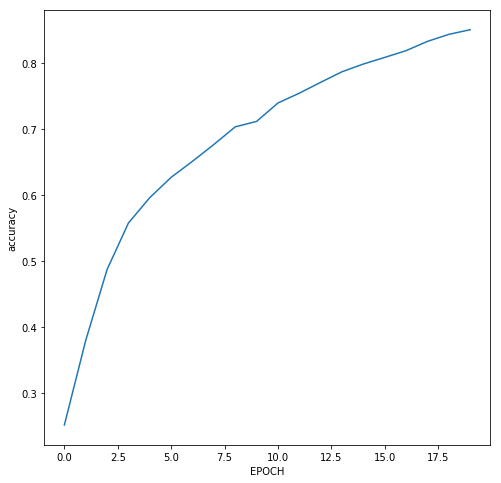

In [10]:
plt.plot(history.history['accuracy'])
plt.ylabel("accuracy")
plt.xlabel("EPOCH")

Text(0,0.5,'error')

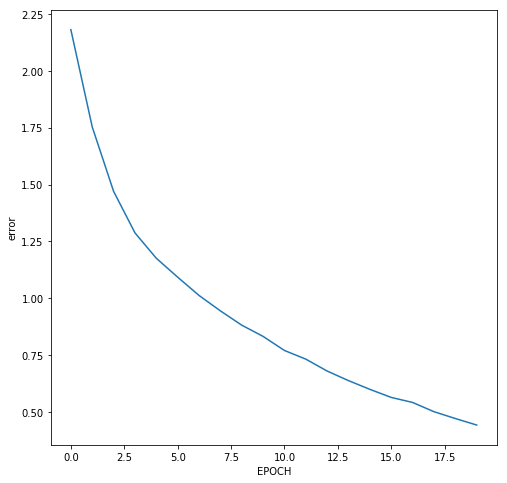

In [9]:
plt.plot(history.history['loss'])
plt.xlabel("EPOCH")
plt.ylabel("error")

In [16]:
import cleverhans
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Install bleeding edge version of cleverhans



In [17]:
!pip install cleverhans==2.1.0

In [31]:
from cleverhans.utils_keras import KerasModelWrapper
from cleverhans.attacks import FastGradientMethod, MadryEtAl, DeepFool, CarliniWagnerL2
#Import necessary packages
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Dense, BatchNormalization
from keras import backend
import keras
import tensorflow.compat.v1 as tf

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from cleverhans.utils_keras import KerasModelWrapper
from cleverhans.attacks import FastGradientMethod, MadryEtAl, DeepFool, CarliniWagnerL2

In [32]:
# Edit the classifier name fed into KerasModel Wrapper with the name of the 
# classifier from above and then run this block

#Get TensorFlow Session to pass into Cleverhans modules
sess = tf.keras.backend.get_session()

#Create wrapper for classifier model so that it can be passed into Cleverhans modules
wrap = KerasModelWrapper(model)

In [30]:
#Implementing the FGSM attack
#FGM Instance on trained classifier from Part 1
fgsm = FastGradientMethod(wrap, sess=sess)

#Attack parameters
fgsm_params = {'eps':0.25, 'clip_min':0.0, 'clip_max':1.0}

#Generate adversarial data
fgsm_adv_data_test = fgsm.generate_np(test_loader, **fgsm_params)

#Evaluate accuracy on target classifier 
fgsm_adv_score = model_classifier.evaluate(fgsm_adv_data_test, labels_test)
print('FGSM Adversarial Attack Accuracy : %.2f%%' %(fgsm_adv_score[1]*100))


AttributeError: ignored